In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/jwei/Downloads/cxc2025/4./amount_and_industry.csv")

In [4]:
# Display the first few rows
print(df.head())

     month  total_amount primaryTag
0  2019-01             0     3DTech
1  2019-01      15982360     AdTech
2  2019-01             0     AgTech
3  2019-01       3099708         AI
4  2019-01      16325000  Analytics


In [5]:


# Pivot the DataFrame to have primaryTag as separate columns
#df_pivot = df.pivot(index="month", columns="primaryTag", values="total_amount").fillna(0)

# Plot as a grouped bar chart
#df_pivot.plot(kind="bar", stacked=False, figsize=(30, 15), colormap="tab10")

# Formatting
#plt.xlabel("Month")
#plt.ylabel("Total Amount")
#plt.title("Total Amount by Industry Over Time")
#plt.show()


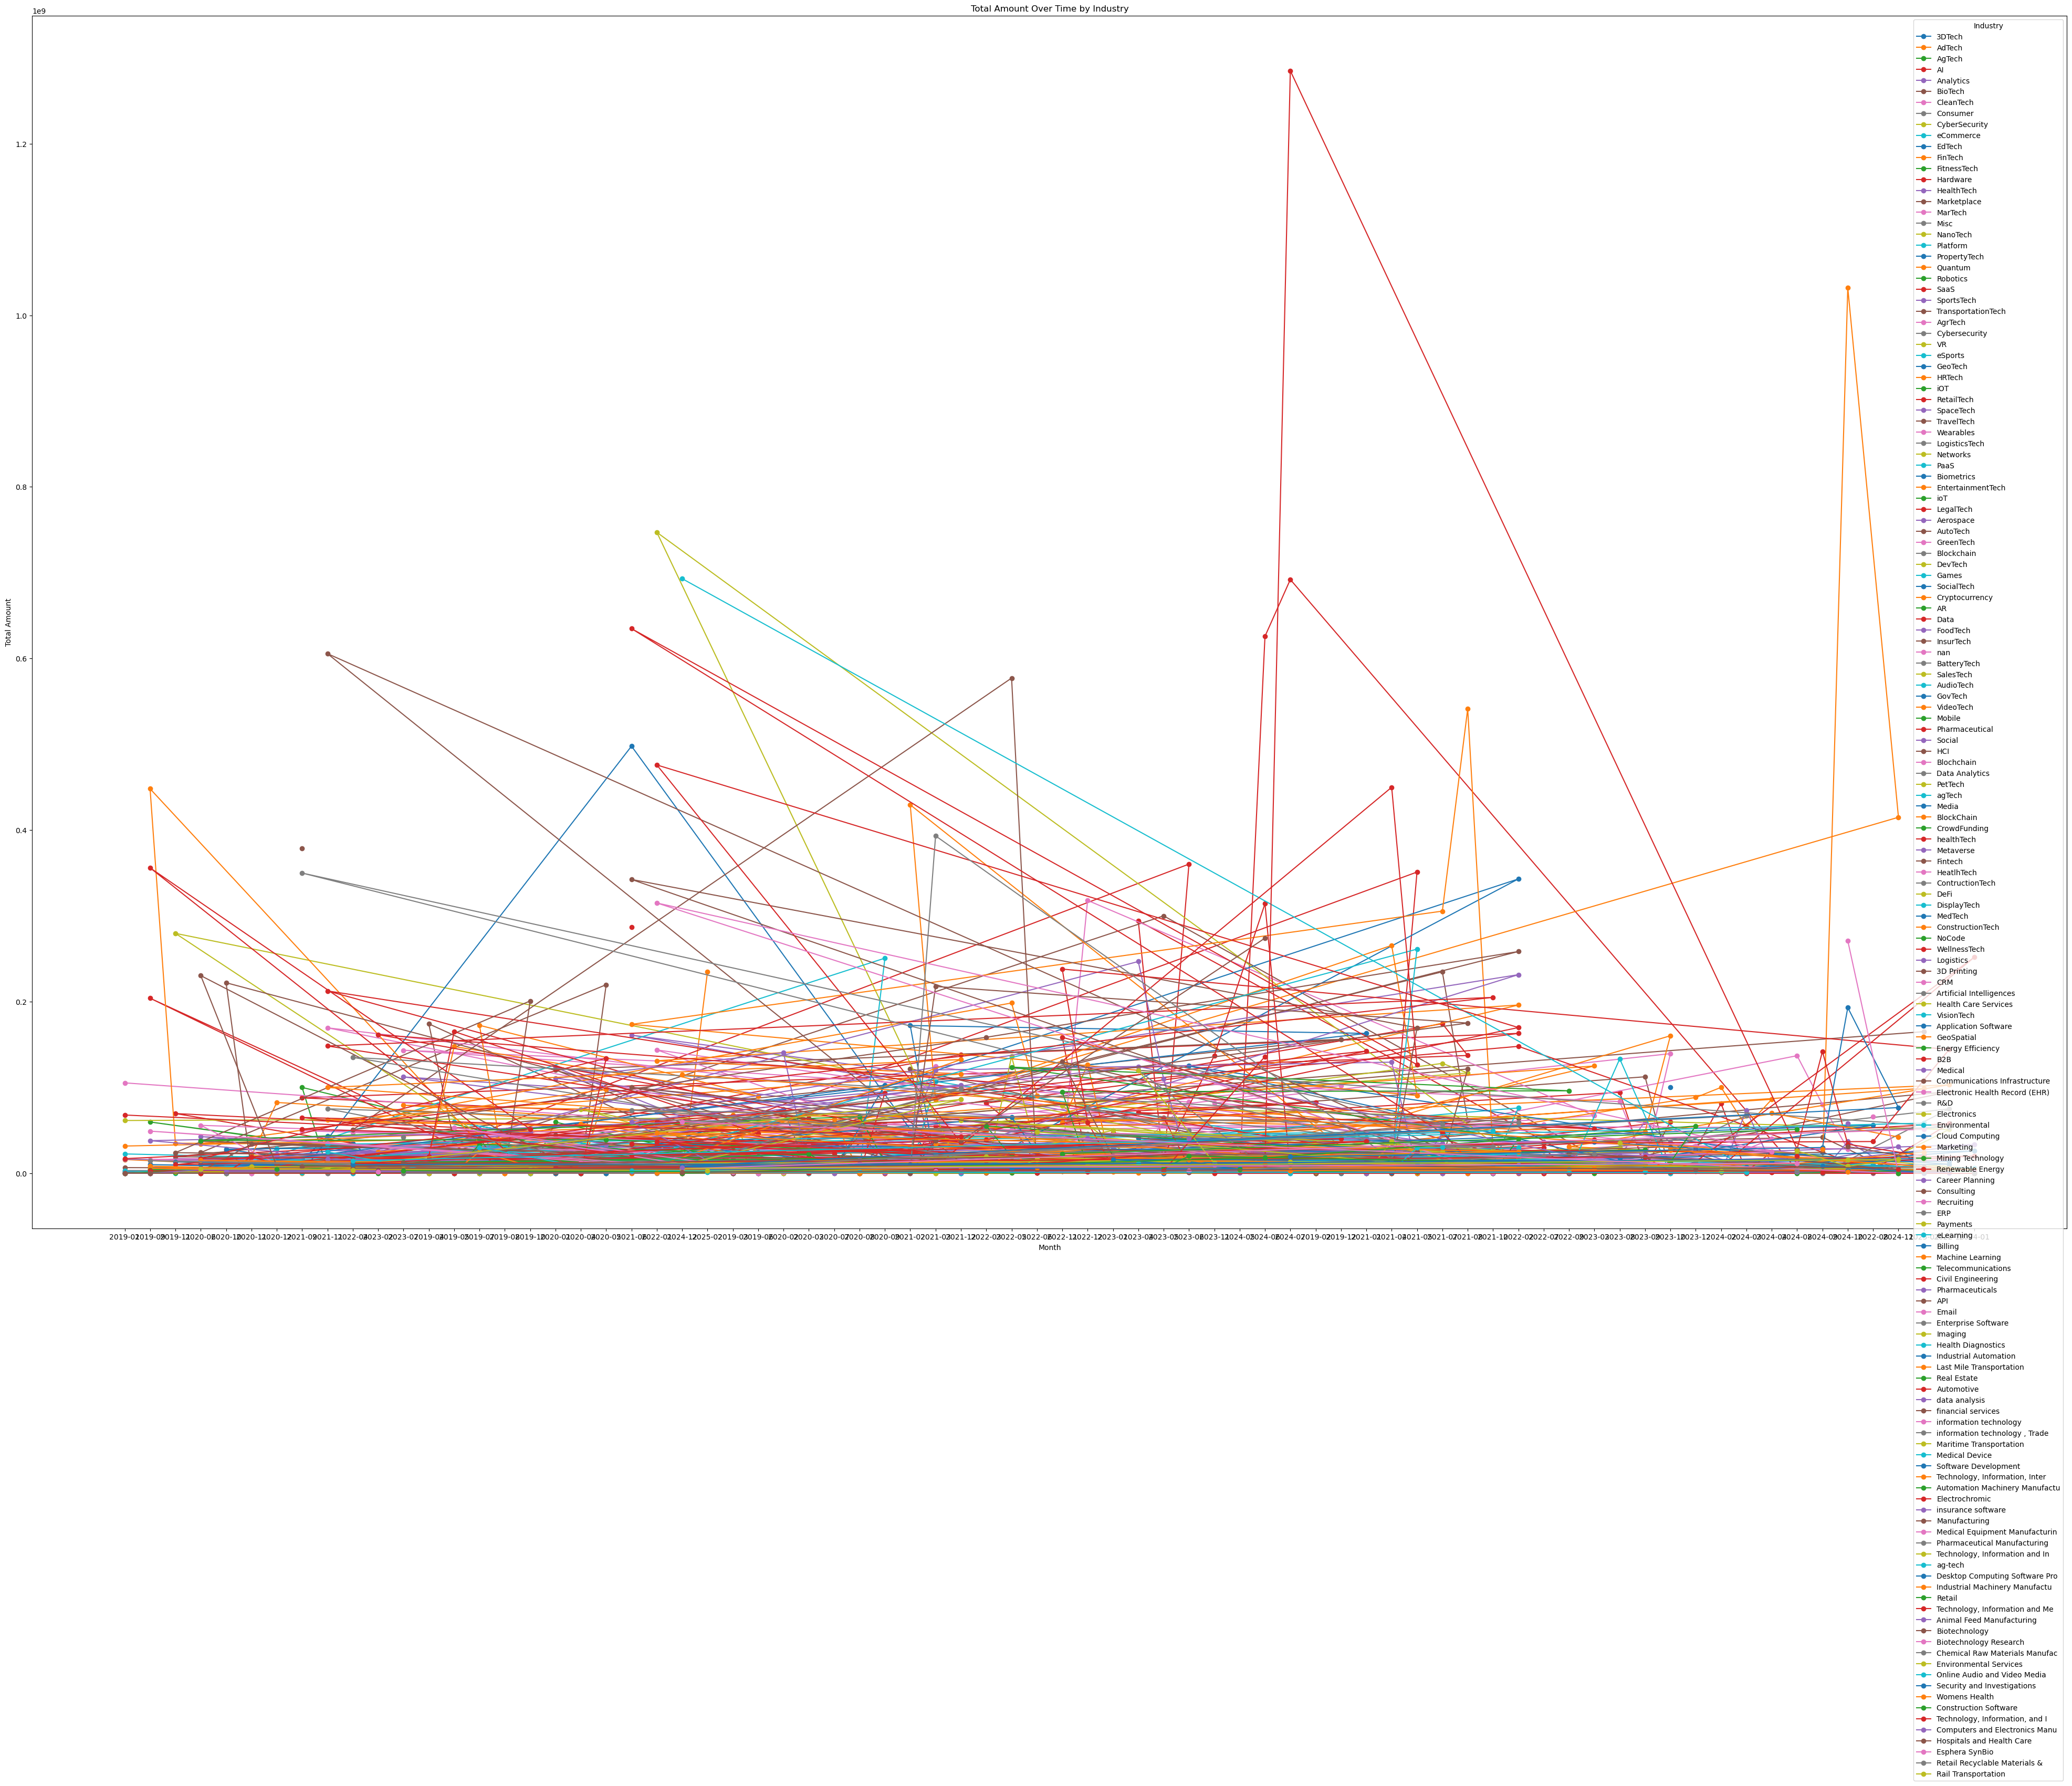

In [6]:

# Set plot size
plt.figure(figsize=(50, 30))

# Use seaborn color palette
sns.set_palette("tab10")

# Loop through each unique primaryTag and plot separately
for tag in df["primaryTag"].unique():
    df_subset = df[df["primaryTag"] == tag]
    plt.plot(df_subset["month"], df_subset["total_amount"], marker='o', label=tag)

# Formatting
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.title("Total Amount Over Time by Industry")
plt.legend(title="Industry")
plt.show()


In [7]:
# Group by primaryTag and sum the total_amount
top_tags = df.groupby("primaryTag")["total_amount"].sum().reset_index()

# Sort by total_amount in descending order
top_tags = top_tags.sort_values(by="total_amount", ascending=False).head(100)

# Display the top tags
print(top_tags)


                         primaryTag  total_amount
62                          FinTech    7059732049
124                            SaaS    6511753573
2                                AI    4328425926
92                      Marketplace    3142870181
31                        CleanTech    2776929614
..                              ...           ...
4                                AR       8487878
78        Hospitals and Health Care       8260009
34   Computers and Electronics Manu       6800000
150                         eSports       6366123
109                  Pharmaceutical       5694350

[100 rows x 2 columns]


In [8]:

#plt.figure(figsize=(12, 30))
#sns.barplot(data=top_tags, x="total_amount", y="primaryTag", palette="viridis")

#plt.xlabel("Total Investment")
#plt.ylabel("Industry (Primary Tag)")
#plt.title("Total Investment by Industry Over Time")
#plt.show()


In [34]:
# Group by month and primaryTag, summing total investment per tag per month
df_grouped = df.groupby(["primaryTag", "month"])["total_amount"].sum().reset_index()

# Compute mean and standard deviation per primaryTag
stats = df_grouped.groupby("primaryTag")["total_amount"].agg(["mean", "std"]).reset_index()

# Compute Sharpe Ratio (mean / std)
stats["sharpe_ratio"] = stats["mean"] / stats["std"]

# Remove entries where std is 0 (to avoid division errors)
stats = stats[stats["std"] > 0]

# Sort by highest Sharpe Ratio and get top 20
top_sharpe = stats.sort_values(by="sharpe_ratio", ascending=False).head(100)
top_sharpe.head(10)

# Plot
#plt.figure(figsize=(12, 30))
#sns.barplot(data=top_sharpe, x="sharpe_ratio", y="primaryTag", palette="mako")

#plt.xlabel("Sharpe Ratio (Risk-Adjusted Investment)")
#plt.ylabel("Industry (Primary Tag)")
#plt.title("Top 20 Industries by Sharpe Ratio")
#plt.show()

primaryTag        mean           std  sharpe_ratio
75               Health Diagnostics    941500.0  2.241528e+05      4.200259
37                       Consulting    900000.0  2.828427e+05      3.181981
13                        AudioTech   2450000.0  7.778175e+05      3.149839
83         Last Mile Transportation  56100000.0  1.965757e+07      2.853863
133  Technology, Information and Me   1625001.5  6.717536e+05      2.419044
22                    Biotechnology  23500000.0  1.060660e+07      2.215601
11             Application Software  10616575.0  5.064618e+06      2.096224
56                Energy Efficiency  36900000.0  1.994041e+07      1.850513
90          Maritime Transportation   9387500.0  5.957375e+06      1.575778
132  Technology, Information and In  13950000.0  9.206700e+06      1.515201

In [10]:
# Get the set of top 100 primary tags by total investment
top_tags = top_tags.reset_index()
top_tags_set = set(top_tags.head(20)["primaryTag"])
print(top_tags.head(20))

    index     primaryTag  total_amount
0      62        FinTech    7059732049
1     124           SaaS    6511753573
2       2             AI    4328425926
3      92    Marketplace    3142870181
4      31      CleanTech    2776929614
5      20        BioTech    2534790800
6      76     HealthTech    2350822627
7      42  CyberSecurity    2023423143
8      51         EdTech    1552798650
9      26     Blockchain    1421289927
10    112       Platform    1322738039
11     73       Hardware    1173210271
12      9      Analytics     945690502
13    138     TravelTech     805093200
14    148      eCommerce     803815640
15    113   PropertyTech     653398519
16    123       Robotics     650065692
17      7         AgTech     508205206
18     14       AutoTech     454912250
19     70      GreenTech     418706450


In [11]:
# Get the set of top 100 primary tags by Sharpe ratio
top_sharpe = top_sharpe.reset_index()
top_sharpe_set = set(top_sharpe.head(20)["primaryTag"])
print(top_sharpe.head(20))

    index                      primaryTag          mean           std  \
0      75              Health Diagnostics  9.415000e+05  2.241528e+05   
1      37                      Consulting  9.000000e+05  2.828427e+05   
2      13                       AudioTech  2.450000e+06  7.778175e+05   
3      83        Last Mile Transportation  5.610000e+07  1.965757e+07   
4     133  Technology, Information and Me  1.625002e+06  6.717536e+05   
5      22                   Biotechnology  2.350000e+07  1.060660e+07   
6      11            Application Software  1.061658e+07  5.064618e+06   
7      56               Energy Efficiency  3.690000e+07  1.994041e+07   
8      90         Maritime Transportation  9.387500e+06  5.957375e+06   
9     132  Technology, Information and In  1.395000e+07  9.206700e+06   
10     36                ConstructionTech  7.697088e+06  5.383146e+06   
11    146                          agTech  2.083357e+07  1.587858e+07   
12    109                  Pharmaceutical  2.847175

### Modify following code block to decide if stuff is sorted by sharpe ratio or total amount.
### Additionally, top tags and top sharpes can be modified. Should probably look at sharpe ratio greater than 1

In [13]:
# Get the set of top 100 primary tags by total investment
top_tags_set = set(top_tags.head(60)["primaryTag"])

# Get the set of top 100 primary tags by Sharpe ratio
top_sharpe_set = set(top_sharpe.head(60)["primaryTag"])

# Find common primary tags in both lists
common_tags = top_tags_set.intersection(top_sharpe_set)

# Filter the original data to include only these common tags
df_common = df[df["primaryTag"].isin(common_tags)]

# Merge df_common with top_sharpe to bring in the sharpe_ratio from top_sharpe
df_common = pd.merge(df_common['primaryTag'], 
                     top_sharpe[['primaryTag', 'sharpe_ratio']],
                     on="primaryTag", 
                     how="left")

df_common = pd.merge(df_common[['primaryTag', 'sharpe_ratio']], 
                     top_tags[['primaryTag', 'total_amount']],
                     on="primaryTag", 
                     how="left")

# Drop the 'month' column and select only 'primaryTag', 'total_amount', and 'sharpe_ratio'
df_common = df_common[['primaryTag', 'total_amount', 'sharpe_ratio']].drop_duplicates().sort_values(by=["total_amount", "sharpe_ratio"], ascending=[False, False])

# Display the cleaned DataFrame
print(df_common)



                         primaryTag  total_amount  sharpe_ratio
2                         CleanTech    2776929614      0.843234
1                           BioTech    2534790800      0.689525
3                        HealthTech    2350822627      0.757403
5                      PropertyTech     653398519      0.706402
7                          Robotics     650065692      0.770692
401            Software Development     348501951      0.736465
412          Biotechnology Research     331000000      0.775146
4                           MarTech     253134728      0.832656
54                             Data     219449225      0.750585
22                        SpaceTech     187734800      0.802661
17                              iOT     176595129      0.746809
27                         Networks     160379625      0.683122
56                        InsurTech     153417279      0.948720
0                            3DTech     151674686      0.889151
31                        LegalTech     

In [14]:
# Find the common primary tags between top_tags and top_sharpe
common_tags = set(top_tags["primaryTag"]).intersection(set(top_sharpe["primaryTag"]))

# Filter the stats and top_tags DataFrames for the common tags
df_common = stats[stats["primaryTag"].isin(common_tags)]
df_common_investment = top_tags[top_tags["primaryTag"].isin(common_tags)]

# Merge the two DataFrames on primaryTag to include both total_amount and sharpe_ratio
df_merged = pd.merge(df_common, df_common_investment, on="primaryTag")

# Sort by Sharpe ratio first (descending), then by total_amount (descending)
df_merged_sorted = df_merged.sort_values(by=["sharpe_ratio", "total_amount"], ascending=[False, False])

# Display the sorted dataframe
print(df_merged_sorted.head(20))

                        primaryTag          mean           std  sharpe_ratio  \
40        Last Mile Transportation  5.610000e+07  1.965757e+07      2.853863   
10                   Biotechnology  2.350000e+07  1.060660e+07      2.215601   
6             Application Software  1.061658e+07  5.064618e+06      2.096224   
25               Energy Efficiency  3.690000e+07  1.994041e+07      1.850513   
46         Maritime Transportation  9.387500e+06  5.957375e+06      1.575778   
68  Technology, Information and In  1.395000e+07  9.206700e+06      1.515201   
14                ConstructionTech  7.697088e+06  5.383146e+06      1.429849   
75                          agTech  2.083357e+07  1.587858e+07      1.312054   
56                  Pharmaceutical  2.847175e+06  2.225513e+06      1.279335   
48                         MedTech  5.302132e+06  4.282785e+06      1.238010   
44                   Manufacturing  9.500000e+06  7.778175e+06      1.221366   
69  Technology, Information, Inter  1.29

In [15]:
# Sort by Sharpe ratio first (descending), then by total_amount (descending)
df_merged_sorted_amount = df_merged.sort_values(by=["total_amount", "sharpe_ratio"], ascending=[False, False])

# Display the sorted dataframe
print(df_merged_sorted_amount.head(20))

       primaryTag          mean           std  sharpe_ratio  index  \
27        FinTech  1.069656e+08  1.624056e+08      0.658633     62   
63           SaaS  9.719035e+07  1.904382e+08      0.510351    124   
1              AI  7.095780e+07  1.366825e+08      0.519143      2   
47    Marketplace  6.686958e+07  1.356189e+08      0.493070     92   
13      CleanTech  4.787810e+07  5.677913e+07      0.843234     31   
9         BioTech  4.608711e+07  6.683893e+07      0.689525     20   
37     HealthTech  3.853808e+07  5.088185e+07      0.757403     76   
17  CyberSecurity  5.058558e+07  1.250925e+08      0.404385     42   
23         EdTech  5.175996e+07  1.122918e+08      0.460942     51   
12     Blockchain  6.460409e+07  1.077247e+08      0.599715     26   
57       Platform  4.008297e+07  1.274080e+08      0.314603    112   
36       Hardware  3.666282e+07  7.162027e+07      0.511906     73   
5       Analytics  1.929981e+07  3.249903e+07      0.593858      9   
72     TravelTech  4